In [3]:
#import libraries

import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns

#import Sckit-helper functions
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

#import Scikit-learn machine models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

#import performance metrics functions
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [4]:
#importing dataset

data = pd.read_csv('sentiment_analysis_ouptut.csv')
data

,linenumber,sentiment,tweet_text
0,1,2,Wllh ana biya sbd kudin beli yawa ne dasu har ...
1,2,3,Kowa yayi da damisa ya duba jikinsa.
2,3,3,Duk wanda ka gani a cikin motar kai shi ka yi ...
3,4,-1,Allah ya tsinewa masu 'karya
4,5,-2,"Mutane Basu D Adalcin Magana, Shugaba Yace Zai..."
...,...,...,...
2944,4193,1,Muma burin haka. Domain wanna makircine ga zam...
2945,4194,-2,Ay dama raini ne da rashin hankali.. Amma in b...
2946,4196,-1,Shikenan Wanda aka konawa ababen hawa sai dai ...
2947,4198,7,"Wannan abun a yaba ne, domin hakan zai sake in..."


In [3]:
#Categorizing sentiments 
#(-1 downward as negative sentiment category[0])
#(+1 upward as positive sentiment category [1])

data.loc[(data['sentiment'] <0 ), 'sentiment'] = 0
data.loc[(data['sentiment'] >0), 'sentiment'] = 1

j = 0
for i in range(0,1):
    data.loc[(data["sentiment"] >= j) & (data["sentiment"] <= i*10), "sentiment"] = i*10
    i = i + 1
    j = j + 10

data

,linenumber,sentiment,tweet_text
0,1,1,Wllh ana biya sbd kudin beli yawa ne dasu har ...
1,2,1,Kowa yayi da damisa ya duba jikinsa.
2,3,1,Duk wanda ka gani a cikin motar kai shi ka yi ...
3,4,0,Allah ya tsinewa masu 'karya
4,5,0,"Mutane Basu D Adalcin Magana, Shugaba Yace Zai..."
...,...,...,...
2944,4193,1,Muma burin haka. Domain wanna makircine ga zam...
2945,4194,0,Ay dama raini ne da rashin hankali.. Amma in b...
2946,4196,0,Shikenan Wanda aka konawa ababen hawa sai dai ...
2947,4198,1,"Wannan abun a yaba ne, domin hakan zai sake in..."


In [4]:
#data split into training and testing datastet

test_percentage = .2
train_df, test_df = train_test_split(data, test_size=test_percentage, random_state=42)

labels = train_df['sentiment']
test_labels = test_df['sentiment']

print("\n### Split Complete ###\n")


### Split Complete ###



- Counting Splits -
Training Samples: 2359
Testing Samples: 590


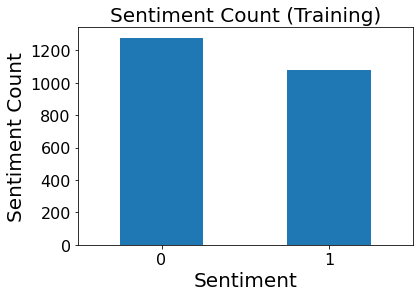

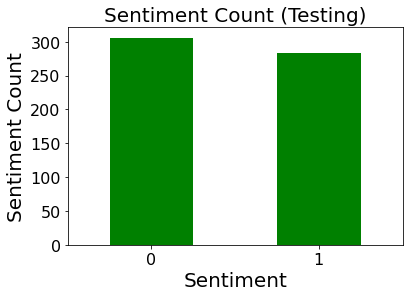

In [5]:
# Print counts of each class
print("- Counting Splits -")
print("Training Samples:", len(train_df))
print("Testing Samples:", len(test_df))

# Graph counts of each class, for both training and testing

count_train_classes = pd.value_counts(train_df['sentiment'])
count_train_classes.plot(kind='bar', fontsize=16)
plt.title("Sentiment Count (Training)", fontsize=20)
plt.xticks(rotation='horizontal')
plt.xlabel("Sentiment", fontsize=20)
plt.ylabel("Sentiment Count", fontsize=20)

plt.show()

count_test_classes = pd.value_counts(test_df['sentiment'])
count_test_classes.plot(kind='bar', fontsize=16, colormap='ocean')
plt.title("Sentiment Count (Testing)", fontsize=20)
plt.xticks(rotation='horizontal')
plt.xlabel("Sentiment", fontsize=20)
plt.ylabel("Sentiment Count", fontsize=20)

plt.show()

In [6]:
# Vectorizer the training inputs -- Takes about 30 seconds to complete
#   There are two types of vectors:
#     1. Count vectorizer
#     2. Term Frequency-Inverse Document Frequency (TF-IDF)



print("- Training Count Vectorizer -")
cVec = CountVectorizer()
count_X = cVec.fit_transform(train_df['tweet_text'])

print("- Training TF-IDF Vectorizer -")
tVec = TfidfVectorizer()
tfidf_X = tVec.fit_transform(train_df['tweet_text'])


print("\n### Vectorizing Complete ###\n")

- Training Count Vectorizer -
- Training TF-IDF Vectorizer -

### Vectorizing Complete ###



In [7]:
# Vectorize the testing inputs
#   Use 'transform' instead of 'fit_transform' because we've already trained our vectorizers

print("- Count Vectorizer -")
test_count_X = cVec.transform(test_df['tweet_text'])

print("- TFIDF Vectorizer -")
test_tfidf_X = tVec.transform(test_df['tweet_text'])


print("\n### Vectorizing Complete ###\n")

- Count Vectorizer -
- TFIDF Vectorizer -

### Vectorizing Complete ###



In [8]:
def generate_report(cmatrix, score, creport):
  """Generates and displays graphical reports
  Keyword arguments:
    cmatrix - Confusion matrix generated by the model
    score --- Score generated by the model
    creport - Classification Report generated by the model
    
  :Returns -- N/A
  """
  
  # Transform cmatrix because Sklearn has pred as columns and actual as rows.
  cmatrix = cmatrix.T
  
  # Generate confusion matrix heatmap
  plt.figure(figsize=(5,5))
  sns.heatmap(cmatrix, 
              annot=True, 
              fmt="d", 
              linewidths=.5, 
              square = True, 
              cmap = 'Blues', 
              annot_kws={"size": 16}, 
              xticklabels=['negative', 'positive'],
              yticklabels=['negative', 'positive'])

  plt.xticks(rotation='horizontal', fontsize=16)
  plt.yticks(rotation='horizontal', fontsize=16)
  plt.xlabel('Actual Label', size=20);
  plt.ylabel('Predicted Label', size=20);

  title = 'Accuracy Score: {0:.4f}'.format(score)
  plt.title(title, size = 20);

  # Display classification report and confusion matrix
  print(creport)
  plt.show()
  

print("\n### Report Generator Defined ###\n")


### Report Generator Defined ###




### Model Built ###

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       306
           1       0.84      0.72      0.77       284

    accuracy                           0.80       590
   macro avg       0.80      0.80      0.80       590
weighted avg       0.80      0.80      0.80       590



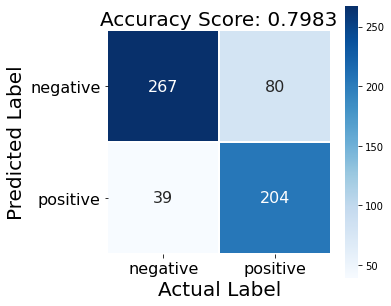

In [9]:
# Multinomial Naive Bayesian with TF-IDF

# Train the model
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(tfidf_X, labels)


# Test the mode (score, predictions, confusion matrix, classification report)
score_mnb_tfidf = mnb_tfidf.score(test_tfidf_X, test_labels)
predictions_mnb_tfidf = mnb_tfidf.predict(test_tfidf_X)
cmatrix_mnb_tfidf = confusion_matrix(test_labels, predictions_mnb_tfidf)
creport_mnb_tfidf = classification_report(test_labels, predictions_mnb_tfidf)

print("\n### Model Built ###\n")
generate_report(cmatrix_mnb_tfidf, score_mnb_tfidf, creport_mnb_tfidf)


### Model Built ###

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       306
           1       0.77      0.84      0.80       284

    accuracy                           0.80       590
   macro avg       0.80      0.80      0.80       590
weighted avg       0.80      0.80      0.80       590



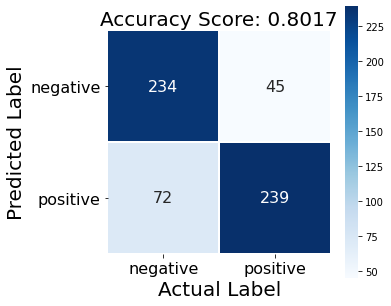

In [10]:
# Multinomial Naive Bayesian with Count Vectorizer

# Train the model
mnb_count = MultinomialNB()
mnb_count.fit(count_X, labels)


# Test the mode (score, predictions, confusion matrix, classification report)
score_mnb_count = mnb_count.score(test_count_X, test_labels)
predictions_mnb_count = mnb_count.predict(test_count_X)
cmatrix_mnb_count = confusion_matrix(test_labels, predictions_mnb_count)
creport_mnb_count = classification_report(test_labels, predictions_mnb_count)

print("\n### Model Built ###\n")
generate_report(cmatrix_mnb_count, score_mnb_count, creport_mnb_count)


### Model Built ###

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       306
           1       0.90      0.73      0.81       284

    accuracy                           0.83       590
   macro avg       0.85      0.83      0.83       590
weighted avg       0.84      0.83      0.83       590



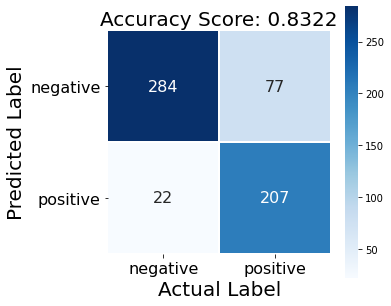

In [11]:
# Logistic Regression with TF-IDF

# Train the model
lgs_tfidf = LogisticRegression(solver='lbfgs')
lgs_tfidf.fit(tfidf_X, labels)


# Test the mode (score, predictions, confusion matrix, classification report)
score_lgs_tfidf = lgs_tfidf.score(test_tfidf_X, test_labels)
predictions_lgs_tfidf = lgs_tfidf.predict(test_tfidf_X)
cmatrix_lgs_tfidf = confusion_matrix(test_labels, predictions_lgs_tfidf)
creport_lgs_tfidf = classification_report(test_labels, predictions_lgs_tfidf)

print("\n### Model Built ###\n")
generate_report(cmatrix_lgs_tfidf, score_lgs_tfidf, creport_lgs_tfidf)


### Model Built ###

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       306
           1       0.91      0.80      0.85       284

    accuracy                           0.86       590
   macro avg       0.87      0.86      0.86       590
weighted avg       0.87      0.86      0.86       590



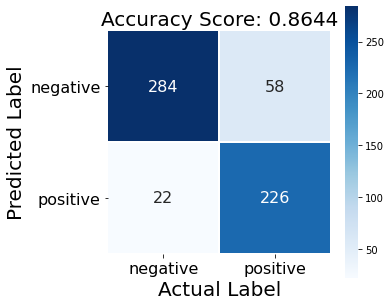

In [12]:
# Logistic Regression with Count Vectorizer

# Train the model
lgs_count = LogisticRegression(solver='lbfgs')
lgs_count.fit(count_X, labels)


# Test the mode (score, predictions, confusion matrix, classification report)
score_lgs_count = lgs_count.score(test_count_X, test_labels)
predictions_lgs_count = lgs_count.predict(test_count_X)
cmatrix_lgs_count = confusion_matrix(test_labels, predictions_lgs_count)
creport_lgs_count = classification_report(test_labels, predictions_lgs_count)

print("\n### Model Built ###\n")
generate_report(cmatrix_lgs_count, score_lgs_count, creport_lgs_count)